# Title: Ecommerce Customer Review by Hrushik Perumalla

#Introduction

E-commerce has led to the exponential growth of how businesses connect with their customers. Millions of customer reviews are created daily on platforms like Amazon, including customer opinions of products and experiences and places to improve (Alrumiah and Hadwan, 2021). But, analysing this huge amount of data manually is neither possible nor practical. In particular, this gap emphasises the need for an automated solution for extracting actionable insights from customer reviews, an important undertaking that is essential to keep customers happy and keep the company in the running to gain a competitive advantage (Behl et al. 2019). This challenge however is addressed by a subset of Natural Language Processing (NLP) task known as sentiment analysis. Automating the sentiment analysis of customer reviews allows businesses to quickly detect defects, monitor customer sentiment trends, and thereby fine-tune products and services to the customer with the aim of better serving them. Not only does it ensure customer satisfaction, but it also helps drive better decisions based on solid data-driven insights.
This report discusses the development of an end-to-end NLP pipeline with a focus on sentiment analysis of Amazon reviews. The report introduces an advanced machine-learning system to classify sentiments in a scalable manner for large-scale text analysis (Ferreira et al. 2019). The potential of the system to shift customer feedback management in the e-commerce sector will be critically evaluated through the evaluation of its performance.

# Dataset Link

Article title
Sentiment Analysis: Amazon Product Reviews

URL
https://www.kaggle.com/datasets/miriamodeyianypeter/sentiment-analysis-amazon-product-reviews

Website title
Kaggle

Date accessed
December 19, 2024

Date published
March 25, 2024

#Business Problem

The e-commerce industry, particularly Amazon, receives a vast number of customer reviews every day. These reviews contain valuable insights into customer satisfaction, product performance, and potential improvements. However, manually analyzing the sentiment of each review is time-consuming and impractical for large-scale operations. Therefore, automating sentiment analysis will help businesses respond promptly to customer feedback, improve product offerings, and enhance customer satisfaction.


#Data Cleaning and Pre-processing

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load the dataset

In [ ]:
df = pd.read_csv('Amazon-Product-Reviews - Amazon Product Review (1).csv')

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


This shows loading of the selected dataset. The  pd.read_csv command helps in reading and loading the dataset in CSV format. The df.head() option helps in returning the string, numeric and other values which finally helps in printing the dataset.

# Data Exploration

In [ ]:
df.shape

(30846, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

The above shows the function of df.info() that helps in providing all the required information on the dataset. It describes how many null values are present in the dataset, the Data type of reach of the column present, overall count, etc.

# Checking null values

In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
review_date          0
sentiment            0
dtype: int64

With the df.isnull().sum() function returns the null values present in each column of the dataset. Here it can be observed that review_headline has 2 null values and review_body has 4 null values.

In [ ]:
# Drop rows with missing values in 'review_headline' and 'review_body'
df = df.dropna(subset=['review_headline', 'review_body'])

The above shows the dropping of the null or missing values found in the dataset.

In [ ]:
df['sentiment'].value_counts()

sentiment
1    25763
0     5077
Name: count, dtype: int64

# Data Cleaning and Preprocessing

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the review body
df['cleaned_review'] = df['review_body'].apply(preprocess_text)

In [ ]:
# Show a sample of cleaned reviews
df[['review_body', 'cleaned_review']].head()

,review_body,cleaned_review
0,Great love it,great love
1,Lots of ads<br />Slow processing speed<br />Oc...,lot adsbr slow processing speedbr occasionally...
2,Excellent unit. The versatility of this table...,excellent unit versatility tablet besides comp...
3,I bought this on Amazon Prime so I ended up bu...,bought amazon prime ended buying gb one camera...
4,All Amazon products continue to meet my expect...,amazon product continue meet expectation


The above shows the data cleaning and pre-processing stage, where reviews are standardised for NLP tasks. This text is simplified by this line of code which utilises WordNetLemmatizer and removes stopwords. It philters out non-alphabetical characters and converts the text to lower case. Its lemmatization of each word bases the correct form and a clean dataset for sentiment analysis.

# Visualizations

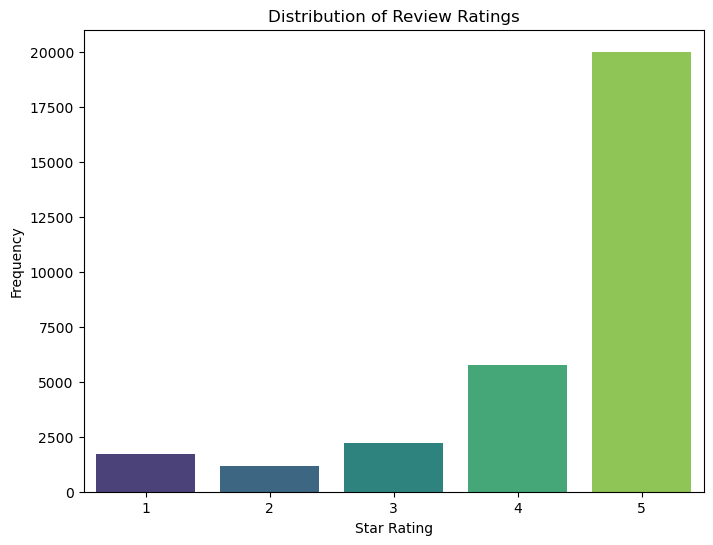

In [ ]:
# Distribution of Review Ratings
plt.figure(figsize=(8,6))
sns.countplot(x='star_rating', data=df, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

A bar chart is shown in this figure depicting how these different star ratings occurred in the dataset frequency. Seaborn’s countplot function is used to flip through how rates are scattered giving us the option of realising possible imbalances in the dataset that can be used in training our model.

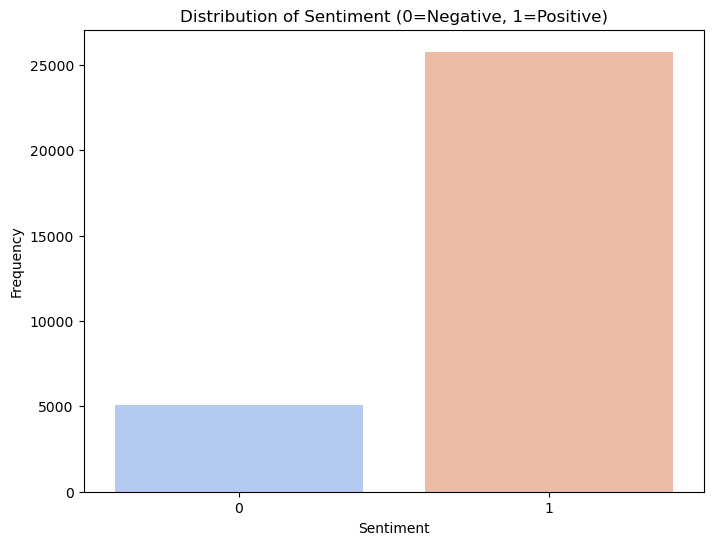

In [ ]:
# Sentiment Class Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiment (0=Negative, 1=Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

Using a Seaborn bar chart, the figure indicates the sentiment distribution of reviews (positive/negative). It helps to know what balance is in the dataset when doing sentiment analysis.

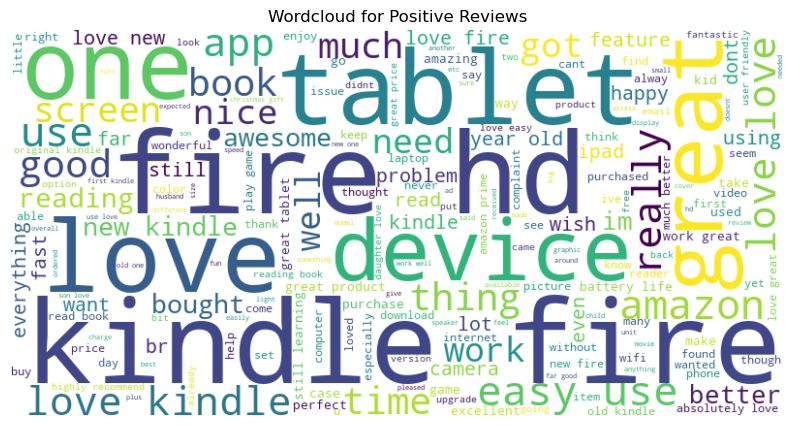

In [ ]:
# Wordcloud for Positive Reviews
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Wordcloud for Positive Reviews')
plt.axis('off')
plt.show()

The result of preprocessed text data using this word cloud are words that appear the most times in positive reviews. It emphasises key themes and associated terms as determined by customers for positive experiences.

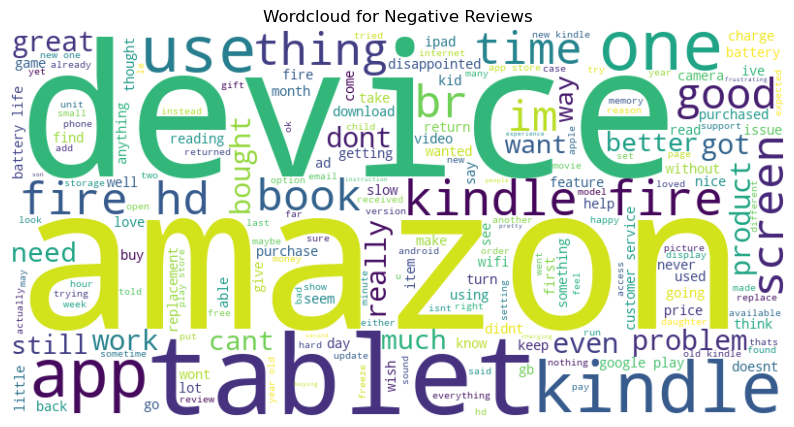

In [ ]:
# Wordcloud for Negative Reviews
negative_reviews = ' '.join(df[df['sentiment'] == 0]['cleaned_review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Wordcloud for Negative Reviews')
plt.axis('off')
plt.show()

The above figure displays the word cloud by showing commonly used terms in negative reviews using the cleaned review data. It illustrates recurrent problems or worries and allows one to ascertain how these can be improved.

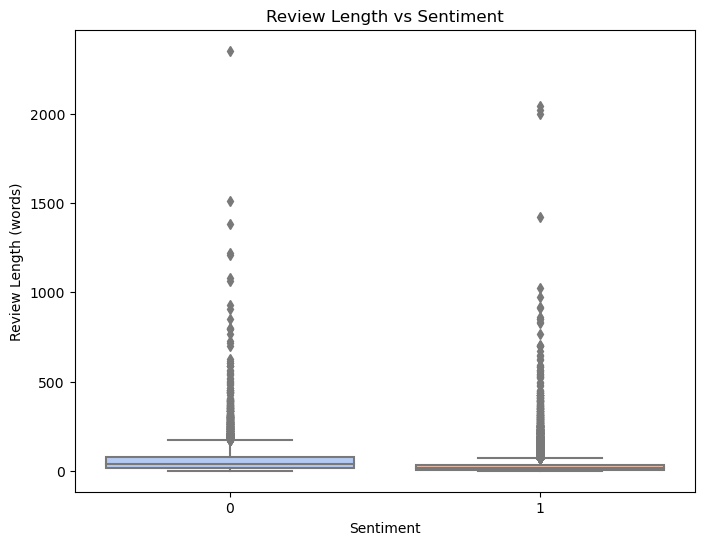

In [ ]:
# Length of Review vs Sentiment
df['review_length'] = df['review_body'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,6))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='coolwarm')
plt.title('Review Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (words)')
plt.show()

First, the boxplot visualises the relationship between review length and sentiment. Extensive experiments on the number of words in the reviews compare how much positive and negative sentiment varies with the number of words in the reviews and expose patterns such as whether longer reviews tend to carry particular sentiments more often.

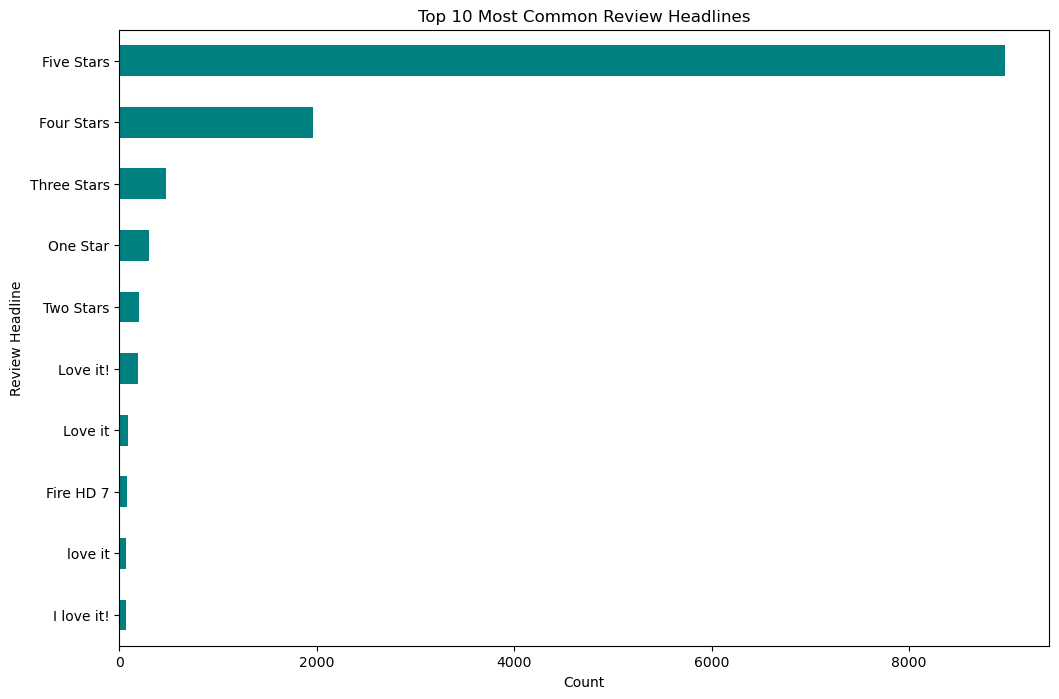

In [ ]:
# Get the top 10 most common review headlines
top_headlines = df['review_headline'].value_counts().head(10)

# Plot the top 10 most common review headlines
plt.figure(figsize=(12, 8))
top_headlines.plot(kind='barh', color='teal')
plt.title('Top 10 Most Common Review Headlines')
plt.xlabel('Count')
plt.ylabel('Review Headline')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


The ten most frequent review headlines in the dataset are presented as a horizontal bar chart. It also lets customers know which phrases are most often used against a product, giving clarity into what potentially common themes or product experiences are.

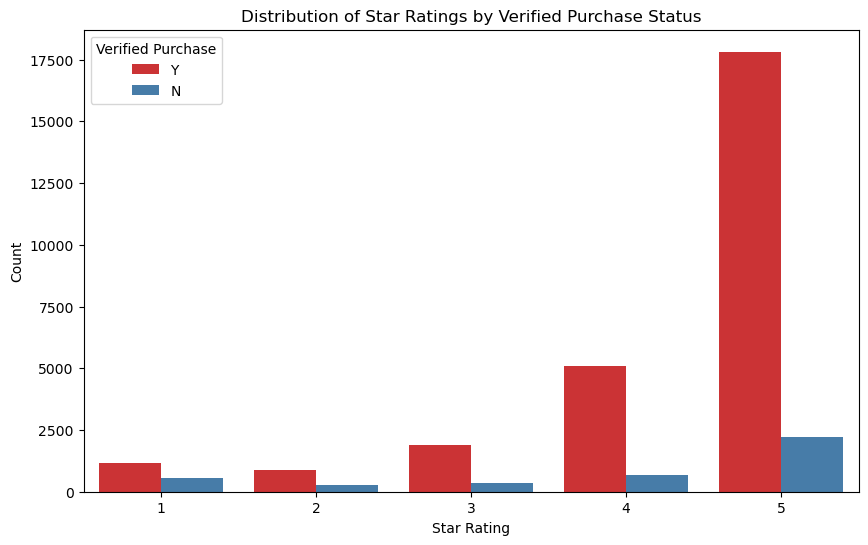

In [ ]:
# Create a countplot for star ratings by verified purchase status
plt.figure(figsize=(10, 6))
sns.countplot(x='star_rating', hue='verified_purchase', data=df, palette='Set1')
plt.title('Distribution of Star Ratings by Verified Purchase Status')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.legend(title='Verified Purchase')
plt.show()

This grouped bar chart shows star ratings depending on whether the reviews are for verified purchases. The comparison shows the difference in tendency to rate between the verified and nonverified customers with implications on trustworthiness and product perception.

In [ ]:
# Feature Extraction (TF-IDF)
X = df['cleaned_review']
y = df['sentiment']

This is how elements of sentiment analysis data preparation are shown here. The dataset is split into training (80%) and testing (20%) datasets for any review. I used the TF-IDF Vectorizer to convert the text features into numerical representations limited to 5000 for speed. It is important to create a machine-readable format from the textual data to be able to be processed by machine learning algorithms and to begin to learn patterns. TF IDF gives more emphasis to important terms in the dataset by normalising the frequency of terms across reviews.

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text data to numerical data using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model Building and Evaluation

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_test_tfidf)
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Evaluation:
Accuracy: 0.9017509727626459
              precision    recall  f1-score   support

           0       0.79      0.56      0.65      1027
           1       0.92      0.97      0.94      5141

    accuracy                           0.90      6168
   macro avg       0.85      0.76      0.80      6168
weighted avg       0.90      0.90      0.89      6168



The logistic regression gets an accuracy of 90.18% with logistic regression. It was found that Class 1 (Positive Sentiment) is more precise (0.92) and has greater recall (0.97) than Class 0 (Negative Sentiment), with a precision and recall of 0.79 and 0.56, respectively. The resulting macro F1 score is 0.80 but the weighted F1 score is 0.89. This means the model is really good with positives but a bit bad with negatives since it’s been presented with imbalanced data.

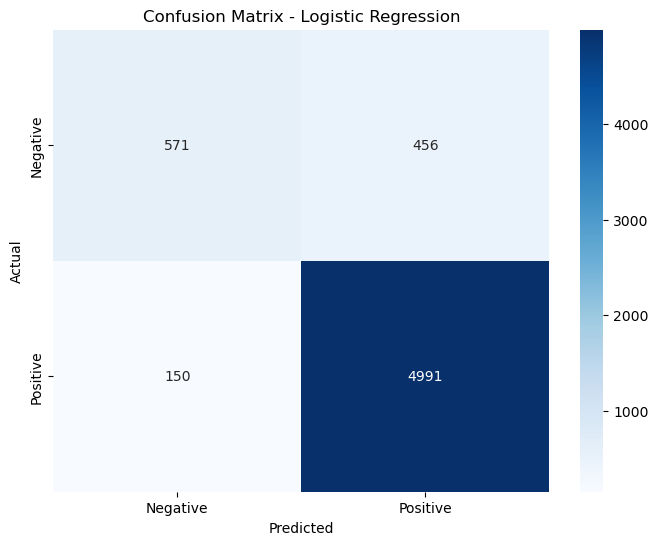

In [ ]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic regression's performance is visualised with this confusion matrix. The image states that it correctly classifies 4991 positives and 571 negatives. The model performs well in terms of positively identifying, and poorly in predicting negatives, as evident from the class imbalance in the dataset, consistent with the data (Shah et al. 2020).

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print("\nSVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Evaluation:
Accuracy: 0.9011024643320363
              precision    recall  f1-score   support

           0       0.77      0.58      0.66      1027
           1       0.92      0.96      0.94      5141

    accuracy                           0.90      6168
   macro avg       0.84      0.77      0.80      6168
weighted avg       0.89      0.90      0.90      6168



An accuracy of 90.11% is achieved by SVM. Class 1 (positive sentiment) achieves F1-score (0.94), recall (0.96), and precision (0.92). The precision of 0.77, recall of 0.58, and F1 score of 0.66 that negative sentiment (Class 0) has made it less effective. These numbers are 0.80 for the macro F1 score and 0.90 for the weighted F1 score. Even though SVM does well with positive sentiments, negative sentiment is much less robust probably due to dataset imbalance.

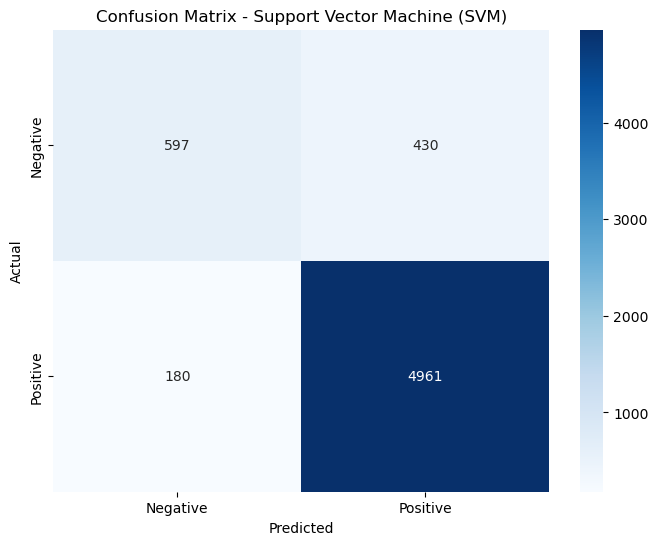

In [ ]:
# Confusion Matrix for Support Vector Machine (SVM)
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

For example, the confusion matrix of the SVM will show 4961 correctly classified positive reviews and 597 correctly classified negative reviews. The results correlate with the combined metrics and the results are strong for positive sentiment detection, but weaker for negative sentiment (Amrani et al. 2018).

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Evaluation:
Accuracy: 0.8842412451361867
              precision    recall  f1-score   support

           0       0.79      0.41      0.54      1027
           1       0.89      0.98      0.93      5141

    accuracy                           0.88      6168
   macro avg       0.84      0.70      0.74      6168
weighted avg       0.88      0.88      0.87      6168



The accuracy of Random Forest is 88.42%. The algorithm achieves high precision (0.89) and recall (0.98) for positive sentiment (Class 1), giving an F1-score of 0.93. Class 0 (negative sentiment) shows low precision (0.79), recall (0.41) and an F1 score of 0.54. The F1 score is 0.74 (macro), and 0.87 (weighted). Limitations in accurately identifying less frequent classes are shown in re call imbalance for negative sentiments (Fauzi, 2018).

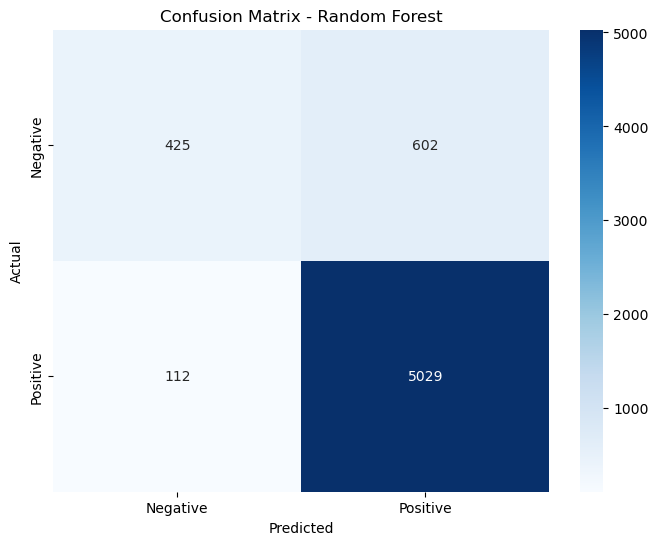

In [ ]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest confusion matrix has 5029 correctly classified positive reviews and 425 correctly classified negative reviews. A strong positive sentiment performance, but difficulty to capture negative sentiments accurately, is indicated by it with 603 misclassified negatives, 103 misclassified positives.

In [ ]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("\nNaive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Evaluation:
Accuracy: 0.8848897535667963
              precision    recall  f1-score   support

           0       0.84      0.38      0.52      1027
           1       0.89      0.99      0.93      5141

    accuracy                           0.88      6168
   macro avg       0.86      0.68      0.73      6168
weighted avg       0.88      0.88      0.87      6168



On average, Naive Bayes reach an accuracy of 88.49%. On Precision, Recall, and An F1 score of 0.93, and have Class 1 (Positive sentiment) as 0.89, and 0.99, respectively. The performance of negative sentiment (Class 0) is low, with a precision of 0.84, a recall of 0.38, and an F1-score of 0.52. The macro F1 score is 0.73 and the weighted F1 score is 0.87. Today the model is good at predicting the positive but is lacking in predicting negative sentiments.

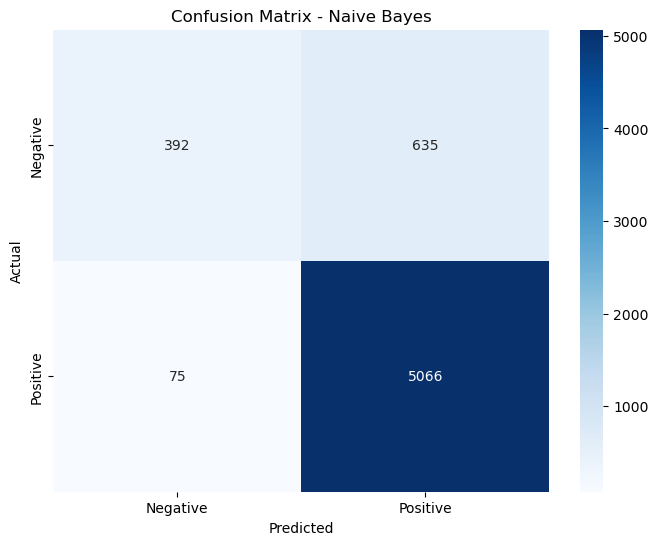

In [ ]:
# Confusion Matrix for Naive Bayes
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

A Naive Bayes confusion matrix of 5089 correctly classified positive reviews and 391 correctly classified negative reviews illustrates what causes confusion. But it is wrong in 52 cases when marking it to be positive when such a review is negative, and 636 cases when marking it to be negative despite it being positive. However, strong positive sentiment detection coexists with weaker negative classification.

# Model Comparison

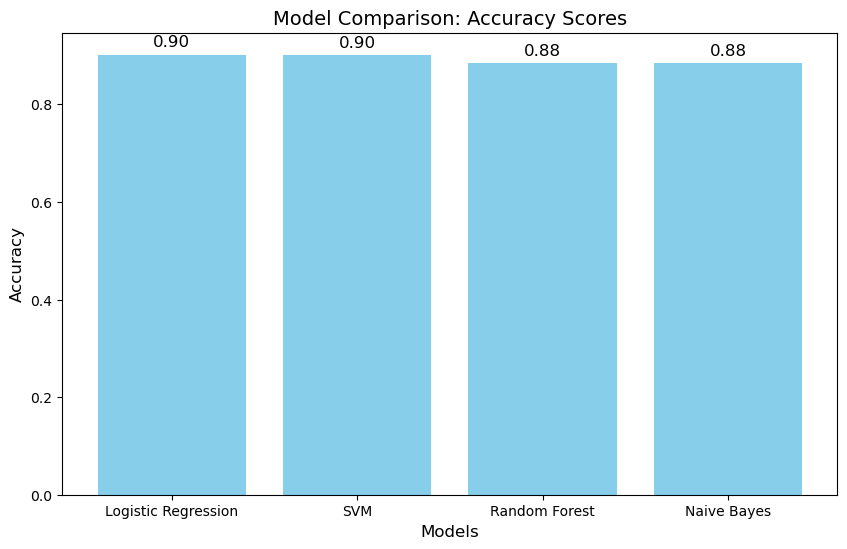

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_logreg)  # Logistic Regression
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # SVM
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Random Forest
accuracy_nb = accuracy_score(y_test, y_pred_nb)  # Naive Bayes

# Store model names and accuracy scores
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes']
accuracy_scores = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_nb]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='skyblue')

# Add accuracy score on top of each bar
for bar, score in zip(bars, accuracy_scores):
    yval = bar.get_height()  # Get the height of the bar (accuracy score)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{score:.2f}',
             ha='center', va='bottom', fontsize=12)

# Title and labels
plt.title('Model Comparison: Accuracy Scores', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Show the plot
plt.show()

It compares the evaluation metrics of Logistic Regression, SVM, Random Forest and Naive Bayes in this figure. Random Forest and Naive Bayes are slightly lower than Logistic Regression and SVM with an accuracy (88%). There is a clear trend in the f1 score between positive sentiments, with all models consistently achieving higher scores compared to negative sentiments, with Naive Bayes being the sharpest for precisely due to poor recall for negatives.

# Display some sample predictions

In [ ]:
sample_predictions = y_pred_logreg[:10]  # Show first 10 predictions
sample_reviews = X_test[:10]  # Corresponding reviews for these predictions

# Display sample predictions alongside actual reviews
print("\nSample Predictions:")
for review, prediction in zip(sample_reviews, sample_predictions):
    print(f"Review: {review[:100]}...")  # Show first 100 characters of the review
    print(f"Predicted Sentiment: {'Positive' if prediction == 1 else 'Negative'}")
    print("-" * 50)


Sample Predictions:
Review: easy use right box really need wifi password everything else cake would definitely recommend...
Predicted Sentiment: Positive
--------------------------------------------------
Review: th kindle love would go back nook given...
Predicted Sentiment: Positive
--------------------------------------------------
Review: junk cant even much cant download anything without catching virus amazoncom dont waste money people...
Predicted Sentiment: Negative
--------------------------------------------------
Review: love...
Predicted Sentiment: Positive
--------------------------------------------------
Review: excellent device easy use box feature device arent mentioned device description huge positive includ...
Predicted Sentiment: Positive
--------------------------------------------------
Review: really like new kindle fire hd numerous entertaining educational program easy find certain website a...
Predicted Sentiment: Positive
--------------------------------------

The sample predictions from the Logistic Regression model along with corresponding reviews here. The model is applied to real-world data, each review is classified as positive or negative. The model can be evaluated across correct and misclassifications of sentiment as it can be seen to be reliable in identifying sentiment with correct classifications, and provide insight into where it may be able to improve with misclassifications.

#Discussion of Findings

Four sentiment analysis models, Logistic Regression, Support Vector Machine (SVM), Random Forest, and Naive Bayes were implemented and shown to possess certain key insights regarding their performance. It can be concluded that Logistic Regression and SVM were best models resulting in close to 90% accuracy and high precision and recall for positive sentiments. However, the datasets demonstrated class imbalance, as was the case for both models in classifying negative sentiments. Naive Bayes and Random Forest slightly outperformed each other (88%), with Naive Bayes achieving high precision but low recall and F1 scores on the negative dataset. Overall, all of the models were able to process and analyse large-scale textual data using a TF-IDF-based preprocessing method and the results show that there is a need to explore approaches to deal with imbalanced datasets for data augmentation or simply class weighting. All these findings are validated in sentiment analysis and suggest ways to improve negative sentiment classification.

#Strength and limitations

#Logistic Regression
**Strengths**

With the highest accuracy achieved at 90.18%.

Classifying positive sentiments with excellent performance.

Positive sentiment with high precision (0.92) and recall (0.97).
Weighted F1 score of 0.89

**Limitations**

Classifying negative sentiments could have been done better.

Negative sentiment with low precision (0.79) and recall (0.56)

Imbalanced dataset struggles

A challenge is precisely determining the type of reviews that are negative.

#Support Vector Machine (SVM)

**Strengths**

At 90.11% accuracy, our model is close to logistic regression accuracy.

Positive sentiment classification task.

For positive sentiment, High F1 (0.94) and recall (0.96) as well as precision (0.92).

Weighted F1 score of 0.90.

**Limitations**

Weak negative sentiment detection

Negative sentiment precision (0.77), recall (0.58) and F1 (0.66) score.

Class imbalance challenge

Poor performance across sentiment classes


# Conclusion

The report can conclude that it was possible to automatically classify sentiment for e-commerce reviews using machine learning. The best performance was given by Logistic Regression and SVM but the negative sentiment detection problem was adversarial in the presence of imbalanced data. To improve the model’s robustness, that is needed to address the class imbalance issues in future work.